In [31]:
# First we need to import the libraries we gonna use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Allow us to plot graphs inside the notebook
%matplotlib inline

In [25]:
iterations = 1000
learningR = 0.01

#### 1 - DATA

The first step when using a machine learning algorithm is getting the data. For this tutorial we are going to generate fake data using numpy and pandas. (Of course this step could be replaced with real data)

In [29]:
# Parameters we use to generate fake data. 
# n is the number of observations in X and Y we'll have
# k is the number of input variables
# m is the number of output variables
n = 100
k = 1
m = 1

In this tutorial we are covering simple linear regression, so the number of input (k) and output (m) variables are setted to 1. Which means we are going to have 1 Y for each X.  

Later when you study multiple linear regression, you'll see that you can have multiple Y for each X, or vice versa. 



##### Generating Noise

As we are creating fake data, we need to add some noise to it so it gets more realistic. 

In [35]:
# The size of the generated noise must be equal to the size of X so we can multiply (the size of X is nxk)
noise = np.random.uniform(-5,5, (n,k))

##### Creating X data

We are going to randomize some X data.

In [33]:
# X will always be the sum of the inputs, even in a multiple linear regression
X_data = np.random.uniform(-10,10, (n,k))

#### Creating Y data

To create Y data based on our X inputs, we'll follow the linear function formula (Y = mX + b).

In [34]:
# Here we create one Y for each X
Y_data = (0.5 * X_data) + 5 + noise

In [36]:
X_df = pd.DataFrame(X_data, columns=['X'])
Y_df = pd.DataFrame(Y_data, columns=['Y'])

my_data = pd.concat([X_df,Y_df], axis=1)

In [38]:
# Data falso gerado
my_data

,X,Y
0,0.689521,3.574381
1,-5.012666,4.802551
2,-7.624601,4.111202
3,7.873490,12.856493
4,9.039411,5.656257
5,1.737647,5.880510
6,-8.176114,2.299602
7,-5.143882,-1.966111
8,-6.338003,-1.986658
9,4.294002,9.626849


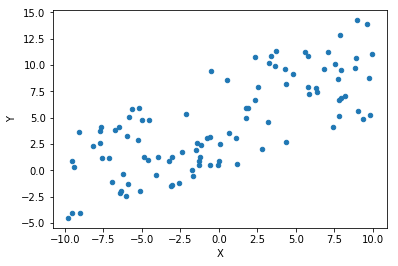

In [39]:
# Data montado no gráfico
my_data.plot(kind='Scatter', x='X',y='Y')

#### 2 - MODEL

Criação do grafo pra linear regression.

In [11]:
# Cria as variables com valores inicialmente randômicos
w = tf.Variable(tf.random_uniform([k,m], minval=-0.1, maxval=0.1))
b = tf.Variable(tf.random_uniform([1,m], minval=-0.1, maxval=0.1))

In [12]:
# Cria os placeholders pra guardar os valores de X e Y
X = tf.placeholder(tf.float32, [n,k])
Y = tf.placeholder(tf.float32, [n,m])

In [13]:
# Y que será previsto
Y_hat = X*w + b

 #### 3 - OBJECTIVE FUNCTION

In [14]:
# Calcula o erro entre os Y reais e os Y previstos (y^)
error = tf.losses.mean_squared_error(Y,Y_hat) / 2.

#### 4 - OPTIMIZATION ALGORITHM

In [15]:
# Varia os weiths e biases (w,b) de forma que o erro gerado entre os Y e os Y^ diminua
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningR).minimize(error)

#### EXECUTION

Executa o grafo, alimentando os placeholders com o data e rodando a loss function e o gradient descent.

In [16]:
sess = tf.InteractiveSession()

In [17]:
init = tf.global_variables_initializer()
sess.run(init)

In [18]:
for i in range(iterations):
    
    _, curr_loss = sess.run([optimizer,error], feed_dict= {X:my_data['X'].values.reshape(n,1) , Y:my_data['Y'].values.reshape(n,1)})
    
    print(curr_loss) # Mostra o erro depois de todas as iterações rodando o gradient descent

25.389875
20.224897
17.979074
16.924461
16.357523
15.991786
15.710571
15.466326
15.239638
15.022566
14.811812
14.606006
14.404529
14.207093
14.013533
13.823742
13.637629
13.455118
13.276139
13.100622
12.928498
12.759706
12.594177
12.431846
12.272656
12.116546
11.963452
11.813321
11.666093
11.521711
11.380122
11.241269
11.1051035
10.97157
10.84062
10.712201
10.586266
10.462766
10.341656
10.222886
10.106414
9.992194
9.880182
9.770337
9.662615
9.556976
9.453381
9.351789
9.252162
9.154462
9.058651
8.964692
8.872551
8.78219
8.693579
8.60668
8.5214615
8.437891
8.355937
8.275568
8.196752
8.119461
8.043665
7.969334
7.896441
7.8249574
7.754856
7.6861095
7.6186934
7.5525813
7.4877467
7.4241676
7.361816
7.3006706
7.240708
7.1819057
7.124239
7.0676894
7.012231
6.957846
6.9045143
6.852212
6.8009224
6.7506237
6.7012978
6.6529274
6.60549
6.5589714
6.5133514
6.4686146
6.424742
6.3817186
6.339527
6.298151
6.257575
6.217784
6.178763
6.140496
6.102968
6.066167
6.030078
5.9946856
5.9599786
5.925941
5.8925

4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.1999216
4.1999216
4.1999216
4.1999216
4.1999216
4.1999216
4.199921
4.1999216
4.1999216
4.199921
4.199921
4.1999216
4.1999216
4.199921
4.199921
4.1999216
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.1999216
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.1999207
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.1999216
4.199921
4.1999216
4.199921
4.199921
4.199921
4.199921
4.199921
4.199921
4.1999216


In [19]:
model_w, model_b = sess.run([w,b])

In [20]:
# Próximo de 0.5, valor do w no data criado
print(model_w)

[[0.5110726]]


In [21]:
# Próximo de 5, valor do b no data criado
print(model_b)

[[5.2008004]]


^ Se os valores forem próximos dos valores de w e b do data, o modelo funciona bem. Quanto menor o curr_loss, mais próximo serão.

In [22]:
# Y previsto para cada valor de X, considerando os novos w e b
Y_pred = my_data['X'].values.reshape(n,1)*model_w + model_b

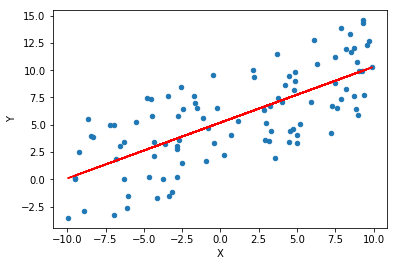

In [23]:
my_data.plot(kind='Scatter', x='X',y='Y')
plt.plot(my_data.X, Y_pred, color='r')